In [1]:
#Importing the pandas dataframe
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

#Importing Seaborn
import seaborn as sns

#Importing matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
rating = ['UserID','MovieID','Rating','Timestamp']
user = ['UserID','Gender','Age','Occupation','Zip-code']
movie = ['MovieID','Title','Genres']

In [3]:
ratings_data = pd.read_csv('ratings.dat',header = None, delimiter = '::', names = rating,
                       dtype={'UserID': np.int32, 'MovieID': np.int32, 'Rating': np.int32, 'Timestamp' : np.str}, engine='python')
print(ratings_data.head())
print()
print(ratings_data.shape)

   UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291

(1000209, 4)


In [4]:
users_data = pd.read_csv('users.dat',header = None, delimiter = '::', names = user,
                     dtype={'UserID': np.int32, 'Gender': np.str, 'Age': np.int32, 'Occupation' : np.int32, 'Zip-code' : np.str}, engine='python')
print(users_data.head())
print()
print(users_data.shape)

   UserID Gender  Age  Occupation Zip-code
0       1      F    1          10    48067
1       2      M   56          16    70072
2       3      M   25          15    55117
3       4      M   45           7    02460
4       5      M   25          20    55455

(6040, 5)


In [5]:
movie_data = pd.read_csv('movies.dat',header=None,delimiter='::',names=movie,encoding="ISO-8859-1",
                      dtype={'MovieID': np.int32, 'Title': np.str, 'Genres': np.str}, engine='python')
print(movie_data.head())
print()
print(movie_data.shape)

   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy

(3883, 3)


## Merging the three datasets

In [6]:
ratings_user = pd.merge(ratings_data,users_data, on=['UserID'])
ratings_movie = pd.merge(ratings_data,movie_data, on=['MovieID'])

master_data = pd.merge(ratings_user,ratings_movie,
                       on=['UserID', 'MovieID', 'Rating'])[['MovieID', 'Title', 'UserID', 'Age', 'Gender', 'Occupation', "Rating"]]
master_data.head()

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
0,1193,One Flew Over the Cuckoo's Nest (1975),1,1,F,10,5
1,661,James and the Giant Peach (1996),1,1,F,10,3
2,914,My Fair Lady (1964),1,1,F,10,3
3,3408,Erin Brockovich (2000),1,1,F,10,4
4,2355,"Bug's Life, A (1998)",1,1,F,10,5


## Exploring the datasets using visual representations (graphs or tables)

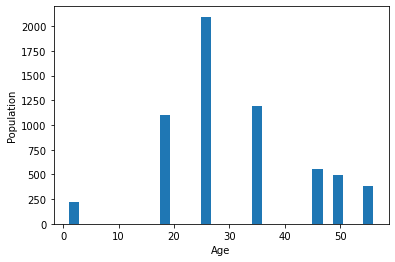

In [7]:
#1) User age distribution
age_distribution=users_data.groupby('Age').size()
plt.hist(x=users_data.Age,bins=30)
plt.xlabel('Age')
plt.ylabel('Population')
plt.show()

In [8]:
#2) User rating for the movie toy story
user_rating = ratings_data.groupby('UserID').size()
user_rating=master_data[master_data.Title=='Toy Story (1995)']
user_rating

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
40,1,Toy Story (1995),1,1,F,10,5
469,1,Toy Story (1995),6,50,F,9,4
581,1,Toy Story (1995),8,25,M,12,4
711,1,Toy Story (1995),9,25,M,17,5
837,1,Toy Story (1995),10,35,F,1,5
...,...,...,...,...,...,...,...
997248,1,Toy Story (1995),6022,25,M,17,5
997541,1,Toy Story (1995),6025,25,F,1,5
998170,1,Toy Story (1995),6032,45,M,7,4
998360,1,Toy Story (1995),6035,25,F,1,4


In [9]:
toystory_data = ratings_data[ratings_data.MovieID==1]
toystory_data

,UserID,MovieID,Rating,Timestamp
40,1,1,5,978824268
469,6,1,4,978237008
581,8,1,4,978233496
711,9,1,5,978225952
837,10,1,5,978226474
...,...,...,...,...
997248,6022,1,5,956755763
997541,6025,1,5,956812867
998170,6032,1,4,956718127
998360,6035,1,4,956712849


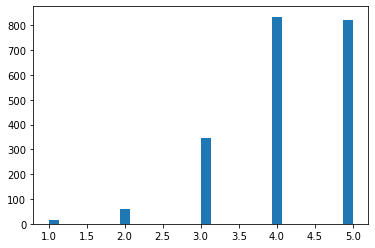

In [10]:
plt.hist(x=user_rating.Rating,bins=30)
plt.show()

<AxesSubplot:xlabel='MovieID', ylabel='MovieID'>

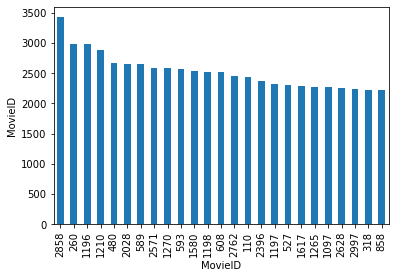

In [11]:
#Top 25 movies by viewership rating
top25_movies=ratings_data.groupby(['MovieID']).size().sort_values(ascending=False)[:25]
top25_movies

plt.ylabel('MovieID')
plt.xlabel('Viewershhip Count')
top25_movies.plot(kind='bar')

In [12]:
movie_rating = ratings_data.groupby(['MovieID'])
avg_movie_rating = movie_rating.agg({'Rating':'mean'})
top25_movies=avg_movie_rating.sort_values('Rating',ascending=False).head(25)

pd.merge(top25_movies,movie_data,how='left',left_on=['MovieID'],right_on=['MovieID'])

,MovieID,Rating,Title,Genres
0,989,5.000000,Schlafes Bruder (Brother of Sleep) (1995),Drama
1,3881,5.000000,Bittersweet Motel (2000),Documentary
2,1830,5.000000,Follow the Bitch (1998),Comedy
3,3382,5.000000,Song of Freedom (1936),Drama
4,787,5.000000,"Gate of Heavenly Peace, The (1995)",Documentary
5,3280,5.000000,"Baby, The (1973)",Horror
6,3607,5.000000,One Little Indian (1973),Comedy|Drama|Western
7,3233,5.000000,Smashing Time (1967),Comedy
8,3172,5.000000,Ulysses (Ulisse) (1954),Adventure
9,3656,5.000000,Lured (1947),Crime


In [13]:
#4.Find the ratings for all the movies reviewed by for a particular user of user id = 2696
user_rating_data=ratings_data[ratings_data['UserID']==2696]
user_rating_data

,UserID,MovieID,Rating,Timestamp
440667,2696,1258,4,973308710
440668,2696,1270,2,973308676
440669,2696,1617,4,973308842
440670,2696,1625,4,973308842
440671,2696,1644,2,973308920
440672,2696,1645,4,973308904
440673,2696,1805,4,973308886
440674,2696,1892,4,973308904
440675,2696,800,5,973308842
440676,2696,2338,2,973308920


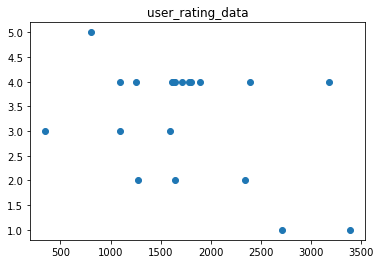

In [14]:
plt.scatter(x=user_rating_data['MovieID'],y=user_rating_data['Rating'])
plt.title('user_rating_data')
plt.show()

## Feature Engineering

In [15]:
#Use column genres:
#1.Find out all the unique genres 
#(Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)
x1=movie_data['Genres'].unique()
x2=movie_data['Genres'].nunique()
x3=movie_data['Genres'].value_counts()
print(x3.head(10))
print(x1)
print('---------------')
print(x2)

Drama             843
Comedy            521
Horror            178
Comedy|Drama      162
Comedy|Romance    142
Drama|Romance     134
Documentary       116
Thriller          101
Action             65
Drama|Thriller     63
Name: Genres, dtype: int64
["Animation|Children's|Comedy" "Adventure|Children's|Fantasy"
 'Comedy|Romance' 'Comedy|Drama' 'Comedy' 'Action|Crime|Thriller'
 "Adventure|Children's" 'Action' 'Action|Adventure|Thriller'
 'Comedy|Drama|Romance' 'Comedy|Horror' "Animation|Children's" 'Drama'
 'Action|Adventure|Romance' 'Drama|Thriller' 'Drama|Romance' 'Thriller'
 'Action|Comedy|Drama' 'Crime|Drama|Thriller' 'Drama|Sci-Fi' 'Romance'
 'Adventure|Sci-Fi' 'Adventure|Romance' "Children's|Comedy|Drama"
 'Documentary' 'Drama|War' 'Action|Crime|Drama' 'Action|Adventure'
 'Crime|Thriller' "Animation|Children's|Musical|Romance"
 'Action|Drama|Thriller' "Children's|Comedy" 'Drama|Mystery'
 'Sci-Fi|Thriller' 'Action|Comedy|Crime|Horror|Thriller' 'Drama|Musical'
 'Crime|Drama|Romance' 'Ad

In [16]:
movies_genres = movie_data['Genres'].str.split('|')
movies_genres

0        [Animation, Children's, Comedy]
1       [Adventure, Children's, Fantasy]
2                      [Comedy, Romance]
3                        [Comedy, Drama]
4                               [Comedy]
                      ...               
3878                            [Comedy]
3879                             [Drama]
3880                             [Drama]
3881                             [Drama]
3882                   [Drama, Thriller]
Name: Genres, Length: 3883, dtype: object

In [17]:
movies_genres1 = movie_data['Genres'].str.get_dummies('|')
movies_genres1

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3879,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3880,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3881,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [18]:
res_col = []
for v in movies_genres:
    for i in v:
        if i not in res_col:
            res_col.append(i)

res_col.append("Gender")
res_col.append("Age")
res_col.append("Rating")

df = pd.DataFrame(columns=res_col)
res = master_data.merge(movie_data, on = ['MovieID'], how="left")[["Genres","Rating","Gender", "Age"]]

for index, row in res.head(2000).iterrows():
    tmp = row.Genres.split("|") 
    
    for i in tmp:
       # print(i)
        df.loc[index,i] = 1
        df.loc[index,"Gender"] = res.loc[index,"Gender"]
        df.loc[index,"Age"] = res.loc[index,"Age"]
        df.loc[index,"Rating"] = res.loc[index,"Rating"]
     
    df.loc[index,df.columns[~df.columns.isin(tmp+["Gender","Rating","Age"])]] = 0
    #df.dropna(inplace=True)

df

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,...,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western,Gender,Age,Rating
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,F,1,5
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,F,1,3
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,F,1,3
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,F,1,4
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,F,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,F,18,5
1996,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,F,18,5
1997,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,F,18,3
1998,0,0,0,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,F,18,1


In [19]:
from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder

In [20]:
X = df[df.columns[~df.columns.isin(["Rating"])]]
y = df.Rating

# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 

number = LabelEncoder()
X_train.Gender = number.fit_transform(X_train["Gender"].astype("str"))
X_test.Gender = number.fit_transform(X_test["Gender"].astype("str"))
y_train = number.fit_transform(y_train.astype("int"))
y_test = number.fit_transform(y_test.astype("int"))

In [21]:
#SVM

from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 
  
  
accuracy = svm_model_linear.score(X_test, y_test) 

cm = confusion_matrix(y_test, svm_predictions) 
accuracy
#cm

0.374

In [22]:
#Naive Bayes classifier 

from sklearn.naive_bayes import GaussianNB 
GN = GaussianNB().fit(X_train, y_train) 
GN_predictions = GN.predict(X_test) 
  
# accuracy on X_test 
accuracy = GN.score(X_test, y_test)  
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, GN_predictions) 

accuracy

0.076